# Data


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = 2*np.random.rand(150,1)
y = 3 + 4*x + 1.5*np.random.randn(150,1)

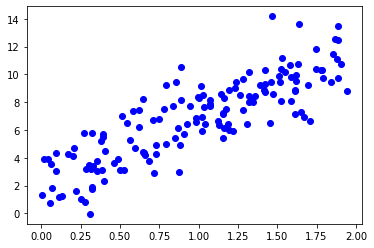

In [4]:
plt.plot(x,y,"bo")
plt.show()

In [5]:
x_b = np.c_[np.ones((150,1)), x]
linear_alg = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y
linear_alg

array([[2.25556804],
       [4.64902188]])

# Formula



Modelo   
    $$ h_\theta(x) = \theta_0 + \theta_1 x_1  $$

Costo
    $$ J(\theta_0 , \theta_1) = \frac{1}{2m} *\sum \limits _{j=1} ^{m} (h_\theta(x^i) - y^i)^2 $$

# Batch Gradient Descent

In [8]:
eta = 0.1 
n_iter = 500
m = x.shape[0]

In [9]:
theta_batch = np.random.randn(2).reshape(2,1)

theta_batch

array([[0.97327387],
       [0.80926   ]])

In [10]:
j = np.zeros(n_iter)

for i in range(n_iter):
    j[i] = (1/(2*m))* (((x_b @ theta_batch)  - y)**2).sum()
    theta_batch = theta_batch  - eta*(1/m * (x_b.T@((x_b @ theta_batch)  - y)))

In [11]:
theta_batch

array([[2.25677293],
       [4.64797067]])

In [12]:
linear_alg

array([[2.25556804],
       [4.64902188]])

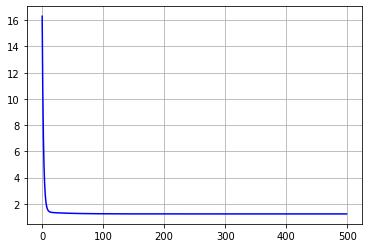

In [13]:
plt.plot(np.arange(n_iter),j,"b-")
plt.grid(True)
plt.show()

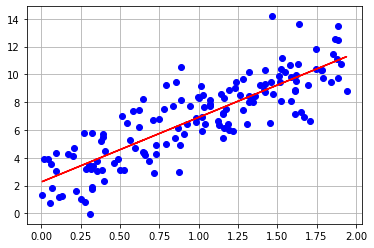

In [14]:
prediction = theta_batch[0] + theta_batch[1]*x

plt.plot(x,y,"bo")
plt.plot(x,prediction ,"r-")
plt.grid(True)
plt.show()

# Stochastic Gradient Descent

In [15]:
theta_stoch= np.random.randn(2).reshape(2,1)
theta_stoch

array([[ 0.01300079],
       [-1.95211514]])

In [16]:
eta = 0.019
n_iter = 1300
m = x.shape[0]

j_stoch = np.zeros(n_iter)

In [17]:


for i in range(n_iter):
    random_index = np.random.randint(0 , m -1)
    x_sample = x[random_index]
    y_sample = y[random_index]
    
    intercept= -2* (y_sample - (theta_stoch[0] + (theta_stoch[1] * x_sample ) ))
    slope = -2* x_sample*(y_sample - (theta_stoch[0] + (theta_stoch[1] * x_sample ) ))

    theta_stoch[0] = theta_stoch[0] - intercept*eta
    
    theta_stoch[1] = theta_stoch[1] - slope*eta

    j_stoch[i] =  (1/(2*m))* (((x_b @ theta_stoch)  - y)**2).sum()
theta_stoch

array([[2.33978432],
       [4.71565046]])

In [18]:
linear_alg

array([[2.25556804],
       [4.64902188]])

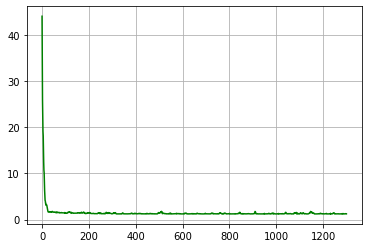

In [19]:
plt.plot(np.arange(n_iter),j_stoch,"g-")
plt.grid(True)
plt.show()

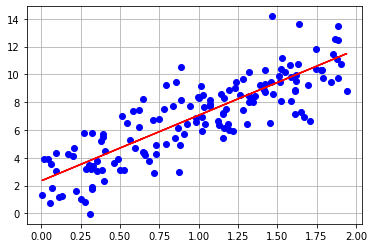

In [20]:
prediction = theta_stoch[0] + theta_stoch[1]*x

plt.plot(x,y,"bo")
plt.plot(x,prediction ,"r-")
plt.grid(True)
plt.show()

# Mini-Batch Gradient Descent

In [21]:
theta_mini = np.random.randn(2).reshape(2,1)
theta_mini

array([[-1.06685005],
       [-0.31298372]])

In [22]:
eta = 0.01
m = x.shape[0]

In [23]:

batch_size = 5

num_batches = int(m/batch_size)
j_mini = np.zeros(num_batches)

for i in range(num_batches):
    random_index = np.random.permutation(m)
    x_sample = x[random_index]
    y_sample = y[random_index]

    for j in range(0,batch_size):
        intercept= -2* (y_sample[j] - (theta_mini[0] + (theta_mini[1] * x_sample[j] ) ))
        slope = -2* x_sample[j]*(y_sample[j] - (theta_mini[0] + (theta_mini[1] * x_sample[j] ) ))

        theta_mini[0] = theta_mini[0] - intercept*eta
    
        theta_mini[1] = theta_mini[1] - slope*eta

    j_mini[i] =  (1/(2*m))* (((x_b @ theta_mini)  - y)**2).sum()
theta_mini

array([[2.77738481],
       [4.08243091]])

In [24]:
linear_alg

array([[2.25556804],
       [4.64902188]])

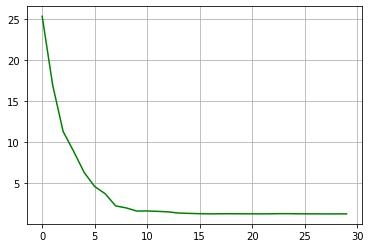

In [25]:
plt.plot(np.arange(num_batches),j_mini,"g-")
plt.grid(True)
plt.show()

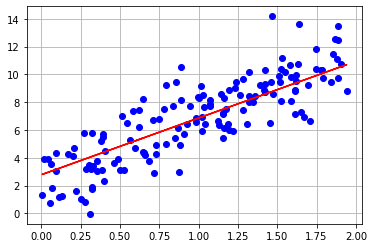

In [26]:
prediction = theta_mini[0] + theta_mini[1]*x

plt.plot(x,y,"bo")
plt.plot(x,prediction ,"r-")
plt.grid(True)
plt.show()